# MODEL BENCHMARKING AND TUNING

# Importing packages

In [121]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score


# setting some parameters
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

# Importing data

In [122]:
final_train_df = pd.read_csv('../datasets/final_train_df.csv')
print(final_train_df.shape)
final_train_df.head()

(1646, 31)


,OverallQual,ExterQual,KitchenQual,GrLivArea,fe_Age,BsmtQual,GarageArea,GarageFinish,TotalBsmtSF,Foundation_PConc,1stFlrSF,FullBath,HeatingQC,FireplaceQu,GarageType_Attchd,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_None,MSSubClass_60,GarageType_Detchd,BsmtFinType1,Foundation_CBlock,Neighborhood_NridgHt,MSZoning_RM,LotShape,MasVnrType_Stone,MSSubClass_30,Foundation_BrkTil,MasVnrType_BrkFace,GarageType_None,SalePrice
0,6,4,4,1479,44,4,475.0,3,725.0,0,725,2,5,1,1,0,0,0,1,0,7,1,0,0,3,0,0,0,1,0,130500
1,7,4,4,2122,24,5,559.0,3,913.0,1,913,2,5,4,1,1,1,0,1,0,7,0,0,0,3,0,0,0,1,0,220000
2,5,3,4,1057,67,4,246.0,2,1057.0,0,1057,1,3,1,0,1,1,1,0,1,7,1,0,0,4,0,0,0,0,0,109000
3,5,3,3,1444,14,5,400.0,4,384.0,1,744,2,4,1,0,1,1,1,1,0,2,0,0,0,4,0,0,0,0,0,174000
4,6,3,3,1445,120,3,484.0,2,676.0,1,831,2,3,1,0,0,0,1,0,1,2,0,0,0,3,0,0,0,0,0,138500


# Model Preparation on Kaggle's train data

## Model Prep: Train-Test-Split of Kaggle's train data set using Scikit-Learn's `train_test_split` function

Here we applied Train-Test-Split to the Kaggles's train data set.

In [123]:
# Set up X and y
X =  final_train_df.drop(["SalePrice"], axis=1, inplace=False)
y =  final_train_df["SalePrice"]
print(y.shape)
print(X.shape)

(1646,)
(1646, 30)


In [124]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [125]:
# checking
print(X_train.shape)
print(X_test.shape)
X_train.head()

(1234, 30)
(412, 30)


,OverallQual,ExterQual,KitchenQual,GrLivArea,fe_Age,BsmtQual,GarageArea,GarageFinish,TotalBsmtSF,Foundation_PConc,1stFlrSF,FullBath,HeatingQC,FireplaceQu,GarageType_Attchd,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_None,MSSubClass_60,GarageType_Detchd,BsmtFinType1,Foundation_CBlock,Neighborhood_NridgHt,MSZoning_RM,LotShape,MasVnrType_Stone,MSSubClass_30,Foundation_BrkTil,MasVnrType_BrkFace,GarageType_None
1539,5,3,3,810,49,5,576.0,2,782.0,1,810,1,5,1,0,0,0,0,0,1,7,0,0,0,4,0,0,0,1,0
495,6,4,4,1218,11,5,676.0,4,1218.0,1,1218,2,5,1,1,1,1,1,0,0,7,0,0,0,3,0,0,0,0,0
1260,6,3,3,1855,66,4,325.0,2,994.0,0,1216,2,4,1,1,0,0,1,0,0,4,1,0,0,4,0,0,0,0,0
832,6,3,3,1384,23,5,390.0,4,384.0,1,754,2,4,4,0,1,1,1,0,0,2,0,0,0,3,0,0,0,0,0
380,8,4,4,1513,21,5,521.0,4,1462.0,1,1513,2,5,4,1,1,1,0,0,0,7,0,0,0,4,0,0,0,1,0


In [126]:
# checking
print(y_train.shape)
print(y_test.shape)
y_train.head()

(1234,)
(412,)


1539    130000
495     208300
1260    136900
832     161500
380     220000
Name: SalePrice, dtype: int64

## Model Prep: Scaling using sklearn StandardScaler

Here we ensured that the data were scaled correctly.

In [127]:
# instantiate
ss = StandardScaler()

# fit X
ss.fit(X_train)

StandardScaler()

In [128]:
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

## Model Prep: Instantiate our model

Here we instantiated all the models that we used in model evalaution.

In [129]:
# Linear Model
lr = LinearRegression()

In [130]:
# Ridge Model
ridge = RidgeCV(alphas=np.linspace(1,1000,100)) # specifiy the range of iterations

In [131]:
# Lasso Model
lasso = LassoCV(n_alphas=100) # specifiy the range of iterations

In [132]:
# ElasticNet Model
enet_alphas = np.arange(0.1, 1.0, 0.01) # elasticnet range usually very small scale
enet_ratio = 0.5
enet = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

## Model Cross Validation

Here we used cross_val_score to evaluate our models.
- train data set = data set given by kaggle that was cleaned and processed in previous steps.
- train bloc = portion of the train data set use to train the model
- test bloc = portion of the train data set use to validate the model

In [133]:
print(X_train_scaled.shape)
print(y_train.shape)

(1234, 30)
(1234,)


### Model Linear Regression

In [134]:
# Estimate of model using LR cross validation
print("Model train bloc R2 (LR) =", cross_val_score(lr, X_train_scaled, y_train, cv=5).mean())
#print("Model train bloc MSE(LR) =", -cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean())
print("Model train bloc RMSE (LR) =", np.sqrt(-cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean()))

# variable for referencing use later
lr_cv_mean_mse = np.sqrt(-cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean())

Model train bloc R2 (LR) = 0.8564793653234325
Model train bloc RMSE (LR) = 22543.249267242787


### Model Ridge Regression

In [135]:
# Ridge R2 of train set
print("Model train bloc R2 (Ridge) =", cross_val_score(ridge,X_train_scaled,y_train,cv=5).mean())
#print("Model train bloc MSE (Ridge) =", -cross_val_score(ridge,X_train_scaled,y_train,cv=5, scoring ='neg_mean_squared_error').mean()
print("Model train bloc RMSE (Ridge) =", np.sqrt(-cross_val_score(ridge,X_train_scaled,y_train,cv=5, scoring ='neg_mean_squared_error').mean()))

Model train bloc R2 (Ridge) = 0.8571014323224689
Model train bloc RMSE (Ridge) = 22497.17341564948


### Model Lasso Regression

In [136]:
# Lasso R2 of train set
print("Model train bloc R2 (Lasso) =", cross_val_score(lasso,X_train_scaled,y_train,cv=5).mean())
#print("Model train bloc MSE (Lasso) =", -cross_val_score(lasso,X_train_scaled,y_train,cv=5, scoring ='neg_mean_squared_error').mean()
print("Model train bloc RMSE (Lasso) =", np.sqrt(-cross_val_score(lasso,X_train_scaled,y_train,cv=5, scoring ='neg_mean_squared_error').mean()))

Model train bloc R2 (Lasso) = 0.8565984259196882
Model train bloc RMSE (Lasso) = 22535.72565160185


### Model ElasticNet Regression

In [137]:
# Lasso R2 of train set
print("Model train bloc R2 (ENet) =", cross_val_score(enet,X_train_scaled,y_train,cv=5).mean())
#print("Model train block MSE (ENet) =", -cross_val_score(enet,X_train_scaled,y_train,cv=5, scoring ='neg_mean_squared_error').mean()
print("Model train bloc RMSE (ENet) =", np.sqrt(-cross_val_score(enet,X_train_scaled,y_train,cv=5, scoring ='neg_mean_squared_error').mean()))

Model train bloc R2 (ENet) = 0.857012571283047
Model train bloc RMSE (ENet) = 22506.52967103197


### Interpretation of model's cross validation scores


|Model Type|Validation Method|R2|RMSE|R2 var +/- 5%|RMSE better?|Remarks|
|:---|:---|:---|:---|:---:|:---:|:---|
|Baseline (Unseen data)|LR cross validation|       0.8577| 	  22,146|---|---|---|
|---|---|---|---|---|---|---|
|Train bloc|LR cross validation|	  0.8565| 	 22,543|Yes|No|Lower bias, Increase variance|
|Train bloc|Ridge cross validation|	 0.8571| 	 22,497|Yes|No|Lower bias, Increase variance|
|Train bloc|Lasso cross validation|	 0.8566| 	 22,536|Yes|No|Lower bias, Increase variance|
|Train bloc|ElasticNet cross validation|	 0.8570| 	 22,507|Yes|No|Lower bias, Increase variance|

**Observation**

When we applied the basic models (without tuning) to the train bloc and comparing it against the baseline. We saw that all the models had lower bias (R2) but it is within the tolerance (+/- 5%) that we set. We also saw an increase in variance (RMSE) but not by a large margin. This was more or less expected as the number of rows had decreased by almost 1/3 of the total train data set rows.

This was a typical case of overfitting where the models matches the training data "too closely”. Learning from the noise in the data, rather than just the signal. This happened because we are evaluating the models by testing it on the same data that was used to train it. Hence, creating a model that is "too complex".

The impact of overfitting was that the models will do well on the training data, but won't generalize to out-of-sample
data. The models will have low bias, but high variance which is exactly what we had observed here.

This observation brought out the need for Regularization. Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them towards zero. It reduces model variance and thus minimizes overfitting.
If the model is too complex, it tends to reduce variance more than it increases bias, resulting in a model that is more likely to generalize. Our goal was to locate the optimum model complexity, and thus regularization is useful when we believe our model is too complex. We shall observed this in the next step.

Note: we added ElasticNet here as we intent to determine in next step if it will produce a better result.

## Model Fitting, Evaluation and Tuning

Fit the model to the train bloc, and evaluate the train and test bloc scores.

In [138]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(1234, 30)
(1234,)
(412, 30)
(412,)


### Model Linear Regression

In [139]:
# fit to linear regression model
lr.fit(X_train_scaled,y_train)

# evaluate R2 of linear regression model
print("R2 (LR) of train bloc " + str(lr.score(X_train_scaled,y_train)))
print("R2 (LR) of test bloc " + str(lr.score(X_test_scaled,y_test)))
#print("R2 (LR) estimate of model using train bloc " + str(lr_cv_scores.mean()))

R2 (LR) of train bloc 0.8657152430545847
R2 (LR) of test bloc 0.8516819836427656


In [140]:
# evaluate MSE of linear regression model
# print("MSE (LR) of train bloc " + str(mean_squared_error(y_train, lr.predict(X_train_scaled))))
# print("MSE (LR) of test bloc " + str(mean_squared_error(y_test,lr.predict(X_test_scaled))))
# print("MSE (LR) estimate of model using train bloc " + str(lr_cv_mse_scores.mean()))

In [141]:
# evaluate RMSE of linear regression model
print("RMSE (LR) of train bloc " + str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train_scaled)))))
print("RMSE (LR) of test bloc " + str(np.sqrt(mean_squared_error(y_test,lr.predict(X_test_scaled)))))
# print("RMSE (LR) estimate of model using train bloc " + str(np.sqrt(lr_cv_mse_scores.mean())))

RMSE (LR) of train bloc 21871.119649589273
RMSE (LR) of test bloc 20783.236629146384


### Ridge Regression

In [142]:
# fit to ridge regression model
ridge.fit(X_train_scaled,y_train)

RidgeCV(alphas=array([   1.        ,   11.09090909,   21.18181818,   31.27272727,
         41.36363636,   51.45454545,   61.54545455,   71.63636364,
         81.72727273,   91.81818182,  101.90909091,  112.        ,
        122.09090909,  132.18181818,  142.27272727,  152.36363636,
        162.45454545,  172.54545455,  182.63636364,  192.72727273,
        202.81818182,  212.90909091,  223.        ,  233.09090909,
        243.18181818,  253.27272727,  263.36363636,  273.45454545...
        687.18181818,  697.27272727,  707.36363636,  717.45454545,
        727.54545455,  737.63636364,  747.72727273,  757.81818182,
        767.90909091,  778.        ,  788.09090909,  798.18181818,
        808.27272727,  818.36363636,  828.45454545,  838.54545455,
        848.63636364,  858.72727273,  868.81818182,  878.90909091,
        889.        ,  899.09090909,  909.18181818,  919.27272727,
        929.36363636,  939.45454545,  949.54545455,  959.63636364,
        969.72727273,  979.81818182,  989.909

In [143]:
ridge.alpha_ # optimal alpha based on range specified

31.272727272727273

In [144]:
# evaluate R2 of ridge regression model
print("R2 (Ridge) of train bloc " + str(ridge.score(X_train_scaled,y_train)))
print("R2 (Ridge) of test bloc " + str(ridge.score(X_test_scaled,y_test)))
#print("R2(Ridge) estimate of model using train bloc " + str(ridge_cv_scores.mean()))

R2 (Ridge) of train bloc 0.865325739531122
R2 (Ridge) of test bloc 0.851493530974442


In [145]:
# evaluate MSE of ridge regression model
# print("MSE (Ridge) of train bloc " + str(mean_squared_error(y_train, ridge.predict(X_train_scaled))))
# print("MSE (Ridge) of test bloc " + str(mean_squared_error(y_test,ridge.predict(X_test_scaled))))
# print("MSE(Ridge) estimate of model using train bloc " + str(ridge_cv_mse_scores.mean()))

In [146]:
# evaluate RMSE of ridge regression model
print("RMSE(Ridge) of train bloc " + str(np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_scaled)))))
print("RMSE(Ridge) of test bloc " + str(np.sqrt(mean_squared_error(y_test,ridge.predict(X_test_scaled)))))
#print("RMSE(Ridge) estimate of model using train bloc " + str(np.sqrt(ridge_cv_mse_scores.mean())))

RMSE(Ridge) of train bloc 21902.81613503797
RMSE(Ridge) of test bloc 20796.43601368687


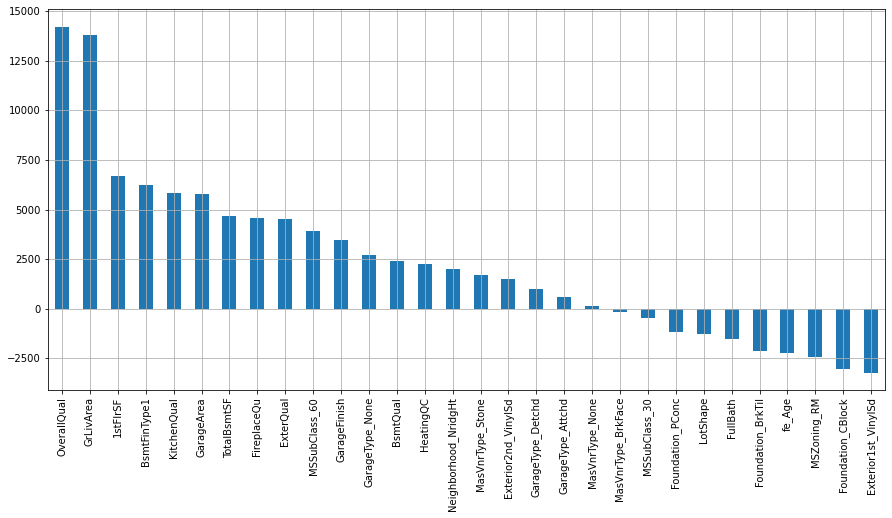

In [147]:
# features with higher scores are more useful in predicting, sorting will be easier to see
col_names = X_train.columns.tolist()
pd.Series(ridge.coef_, index=col_names).sort_values(ascending=False).plot.bar(figsize=(15,7)).grid(zorder=0);

**Observation**

Ridge regression penalizes the model for having large coefficients. It shrinks the regression coefficients where as alpha increases, coefficients decreases. Ridge alpha acts as a "tuning" parameter". From the plot above, features such as `OverallQual``1stFlrSF``GrLivArea` would be penalized the most.

In [148]:
ridge_coefficients = ridge.coef_
ridge_coefficients

array([14216.55224153,  4498.70379159,  5835.92174849, 13775.77805358,
       -2219.0222923 ,  2387.23597832,  5778.09121547,  3443.5305655 ,
        4655.34637344, -1179.00463168,  6699.35066782, -1500.2380157 ,
        2268.90930395,  4549.08911581,   613.42018595, -3219.80636644,
        1511.71624346,   116.06830021,  3935.15298198,   994.90876626,
        6237.9920433 , -3062.043096  ,  1997.40110488, -2431.55858079,
       -1281.06456296,  1687.26838913,  -472.02745343, -2123.35697085,
        -172.39345683,  2692.57365563])

In [149]:
ridge_coef_df = pd.DataFrame({'predictors': [col for col in col_names],
                              'coefficients': ridge_coefficients})
ridge_coef_df

,predictors,coefficients
0,OverallQual,14216.552242
1,ExterQual,4498.703792
2,KitchenQual,5835.921748
3,GrLivArea,13775.778054
4,fe_Age,-2219.022292
5,BsmtQual,2387.235978
6,GarageArea,5778.091215
7,GarageFinish,3443.530565
8,TotalBsmtSF,4655.346373
9,Foundation_PConc,-1179.004632


### Lasso Regression

In [150]:
# fit to lasso regression model
lasso.fit(X_train_scaled,y_train)

LassoCV()

In [151]:
# optimal alpha based on range specified
lasso_optimal_alpha = lasso.alpha_
lasso_optimal_alpha

111.20097954703498

In [152]:
# evaluate R2 of Lasso regression model
print("R2 (Lasso) of train set " + str(lasso.score(X_train_scaled,y_train)))
print("R2 (Lasso) of test set " + str(lasso.score(X_test_scaled,y_test)))
#print("R2 (Lasso) estimate of model using train set " + str(lasso_cv_scores.mean()))

R2 (Lasso) of train set 0.8650620589060484
R2 (Lasso) of test set 0.8509717524761509


In [153]:
# evaluate MSE of Lasso regression model
# print("MSE (Lasso) of train set " + str(mean_squared_error(y_train, lasso.predict(X_train_scaled))))
# print("MSE (Lasso) of test set " + str(mean_squared_error(y_test,lasso.predict(X_test_scaled))))
# print("MSE (Lasso) estimate of model using train set " + str(lasso_cv_mse_scores.mean()))

In [154]:
# evaluate RMSE of Lasso regression model
print("RMSE (Lasso) of train set " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_scaled)))))
print("RMSE (Lasso) of test set " + str(np.sqrt(mean_squared_error(y_test,lasso.predict(X_test_scaled)))))
#print("RMSE (Lasso) estimate of model using train set " + str(np.sqrt(lasso_cv_mse_scores.mean())))

RMSE (Lasso) of train set 21924.24756552978
RMSE (Lasso) of test set 20832.938189481214


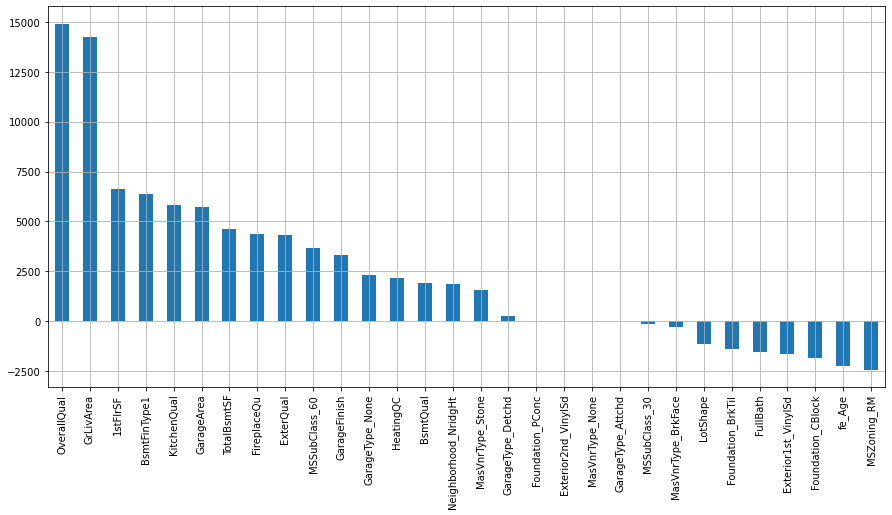

In [155]:
# features with higher scores are more useful in predicting, sorting will be easier to see
col_names = X_train.columns.tolist()
pd.Series(lasso.coef_, index=col_names).sort_values(ascending=False).plot.bar(figsize=(15,7)).grid(zorder=0);

**Observation**

Lasso regression penalizes the model for having large coefficients where as alpha increases, coefficients decreases even to the point of zero. Lasso alpha acts as a "tuning" parameter. From the plot above, features such as `OverallQual``1stFlrSF``GrLivArea` would be penalized the most, while features such as `GarageType_Detchd` `Exterior2nd_VinylSd` `MasVnrType_BrkFace` would be penalized to zero. Which also mean that they could be removed from the model.

In [156]:
lasso_coefficients = lasso.coef_
lasso_coefficients

array([14908.59466401,  4320.24162087,  5839.98453035, 14247.07058732,
       -2245.23381629,  1913.83611143,  5735.091118  ,  3311.16035216,
        4614.5752404 ,    -0.        ,  6649.03893776, -1544.28633341,
        2150.98163002,  4374.7486271 ,     0.        , -1623.58336728,
           0.        ,     0.        ,  3660.44708284,   246.21908417,
        6394.87672569, -1822.66572675,  1854.06841447, -2422.2581767 ,
       -1141.45502433,  1543.91109277,  -143.74454489, -1377.43157813,
        -266.15801696,  2299.14512953])

In [157]:
# put the coef into a dataframe
lasso_coef_df = pd.DataFrame({'predictors': [col for col in col_names],
                              'coefficients': lasso_coefficients})
print(len(lasso_coef_df))
lasso_coef_df

30


,predictors,coefficients
0,OverallQual,14908.594664
1,ExterQual,4320.241621
2,KitchenQual,5839.984530
3,GrLivArea,14247.070587
4,fe_Age,-2245.233816
5,BsmtQual,1913.836111
6,GarageArea,5735.091118
7,GarageFinish,3311.160352
8,TotalBsmtSF,4614.575240
9,Foundation_PConc,-0.000000


In [158]:
# coef with zero to drop
lasso_coef_to_drop = lasso_coef_df.loc[lasso_coef_df.coefficients==0, ['predictors', 'coefficients']]
lasso_coef_to_drop_list = lasso_coef_to_drop.predictors.tolist()
print(len(lasso_coef_to_drop_list))
print(lasso_coef_to_drop_list)

4
['Foundation_PConc', 'GarageType_Attchd', 'Exterior2nd_VinylSd', 'MasVnrType_None']


### ElasticNet Regression

In [159]:
# set parameters
enet_alphas = np.arange(0.1, 1.0, 0.01) #elasticnet range usually very small scale
enet_ratio = 0.5

In [160]:
# fit to ElasticNet regression model
enet.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99]),
             cv=5)

In [161]:
# Here is the optimal value of alpha
enet_optimal_alpha = enet.alpha_
enet_optimal_alpha

0.1

In [162]:
# evaluate R2 of elasticnet regression model
print("R2 (ENet) of train set " + str(enet.score(X_train_scaled,y_train)))
print("R2 (ENet) of test set " + str(enet.score(X_test_scaled,y_test)))

R2 (ENet) of train set 0.8648126971614287
R2 (ENet) of test set 0.8516798287207844


In [163]:
# evaluate RMSE of Lasso regression model
print("RMSE (ENet) of train set " + str(np.sqrt(mean_squared_error(y_train, enet.predict(X_train_scaled)))))
print("RMSE (ENet) of test set " + str(np.sqrt(mean_squared_error(y_test,enet.predict(X_test_scaled)))))

RMSE (ENet) of train set 21944.495929924702
RMSE (ENet) of test set 20783.387609087582


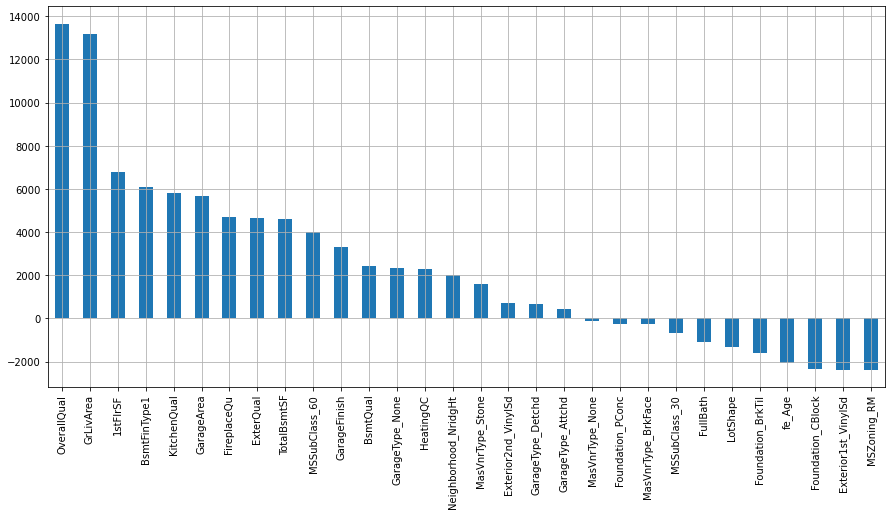

In [164]:
# features with higher scores are more useful in predicting, sorting will be easier to see
col_names = X_train.columns.tolist()
pd.Series(enet.coef_, index=col_names).sort_values(ascending=False).plot.bar(figsize=(15,7)).grid(zorder=0);

**Observation**

Elastic net combines Ridge and Lasso penalties with both Ridge alpha and Lasso alpha acting as "tuning" parameters. Elastic Net allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. From the plot above, features such as `OverallQual``1stFlrSF``GrLivArea` would be penalized the most by Ridge, while features such as `Exterior2nd_VinylSd` would be penalized to zero by Lasso which also mean that it could be removed from the model.

In [165]:
enet_coefficients = enet.coef_
enet_coefficients

array([13652.1917759 ,  4646.107902  ,  5821.63406763, 13185.9906552 ,
       -2039.46709919,  2432.00654144,  5691.13534733,  3311.47402916,
        4630.49431992,  -247.25969527,  6766.8590846 , -1090.71998763,
        2283.65134957,  4694.63503737,   454.31378396, -2366.56947629,
         738.90197654,  -114.11108851,  3998.0139753 ,   677.8606372 ,
        6076.8871831 , -2322.47927506,  1991.25496856, -2368.62122481,
       -1306.24993581,  1607.87139433,  -657.06522555, -1593.55820434,
        -250.06119039,  2330.25845516])

In [166]:
enet_coef_df = pd.DataFrame({'predictors': [col for col in col_names],
                              'coefficients': enet_coefficients})
enet_coef_df

,predictors,coefficients
0,OverallQual,13652.191776
1,ExterQual,4646.107902
2,KitchenQual,5821.634068
3,GrLivArea,13185.990655
4,fe_Age,-2039.467099
5,BsmtQual,2432.006541
6,GarageArea,5691.135347
7,GarageFinish,3311.474029
8,TotalBsmtSF,4630.494320
9,Foundation_PConc,-247.259695


In [167]:
# coef with zero to drop
enet_coef_to_drop = enet_coef_df.loc[enet_coef_df.coefficients==0, ['predictors', 'coefficients']]
enet_coef_to_drop_list = enet_coef_to_drop.predictors.tolist()
print(len(enet_coef_to_drop_list))
print(enet_coef_to_drop_list)

0
[]


### Interpretation of model's evaluation


|Model Type|Validation Method|R2|RMSE|R2 var +/- 5%|RMSE better?|Remarks|
|:---|:---|:---|:---|:---:|:---:|:---|
|Baseline (Unseen data)|LR cross validation|       0.8577| 	  22,146|---|---|---|
|---|---|---|---|---|---|---|
|Train bloc|LR cross validation|	  0.8565| 	 22,543|Yes|No|Lower bias, Increase variance|
|Train bloc|Ridge cross validation|	 0.8571| 	 22,497|Yes|No|Lower bias, Increase variance|
|Train bloc|Lasso cross validation|	 0.8566| 	 22,536|Yes|No|Lower bias, Increase variance|
|Train bloc|ElasticNet cross validation|	 0.8570| 	 22,507|Yes|No|Lower bias, Increase variance|
|---|---|---|---|---|---|---|
|LR on Train bloc|fit and score|	 0.8657| 	 21,871|Yes|Yes|Increase bias, Lower variance|
|Ridge on Train bloc|fit and score|	 0.8653| 	 21,903|Yes|Yes|Increase bias, Lower variance|
|Lasso on Train bloc|fit and score|	 0.8651| 	 21,924|Yes|Yes|Increase bias, Lower variance|
|ElasticNet on Train bloc|fit and score|	 0.8648| 	 21,944|Yes|Yes|Increase bias, Lower variance|
|---|---|---|---|---|---|---|
|LR on Test bloc|fit and score|	  0.8517| 	 20,783|Yes|Yes|Increase bias, Lower variance|
|Ridge on Test bloc|fit and score|	 0.8515| 	 20,796|Yes|Yes|Increase bias, Lower variance|
|Lasso on Test bloc| fit and score|	 0.8510| 	 20,833 |Yes|Yes|Increase bias, Lower variance|
|ElasticNet on Test bloc|fit and score|	 0.8517| 	 20,783|Yes|Yes|Increase bias, Lower variance|

**Observation**

**1. Train bloc Fit and Score vs Train bloc Cross Validation:**
- Although there was an increase in bias (R2), it was within tolerance.
- Variance had decreased considerably across models using default hyperparameters and optimal alphas. Among the models, Lasso Regression had the largest reduction in RMSE of -2.71% (21924/22536).

**2. Test bloc Fit and Score vs Train bloc Fit and Score**
- Consistent in increase in bias but within tolerance and decreased variance considerably across all models. Again, among the models, Lasso Regression registered the largest reduction in RMSE of -7.56% (20833/22536).

**3. Train and Test bloc vs Baseline Cross Validation**
- In comparison to baseline, all the models had lower RMSE than baseline. This is encouraging as it proved that the models are all working to outperform baseline, we just need to choose the best one.
- Both the train and test bloc results were consistent against baseline as well.

**MODEL SELECTED**

Based on the results, although all models performed better. Lasso Regression produced the best result of reducing variance, RMSE score while maintaining with 5% tolerance of R2. We also observed that there are 4 features that Lasso zeroed their coefficients which meant that we could removed these 4 features from the model.

The optimal alpha was calculated at 111.200979547034. Thus, we decided to fine-tune the Lasso model by removing the 5 features and re-run it at optimal alpha, then setting it as the selected production model.

## Re-run Lasso with reduced features

In [168]:
# now we drop the features recommended by lasso at optimal alpha and create a reduced dataframe for model benchmark

X_reduced = X.drop(columns=lasso_coef_to_drop_list, axis=1, inplace=False)
y_reduced = final_train_df["SalePrice"]
print(X_reduced.shape)
print(y_reduced.shape)

(1646, 26)
(1646,)


In [169]:
# re-create train-test-split as the number of columns had changed
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1234, 26) (412, 26)
(1234,) (412,)


In [170]:
# re-instantiate
ss = StandardScaler()

# re-fit X
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [171]:
# Lasso Model with the recommended optima alpha in earlier step
lasso = Lasso(alpha = 111.200979547034)

In [172]:
# fit to lasso regression model
lasso.fit(X_train_scaled,y_train)

Lasso(alpha=111.200979547034)

In [173]:
# evaluate R2 of Lasso regression model
print("R2 (Lasso) of train set " + str(lasso.score(X_train_scaled,y_train)))
print("R2 (Lasso) of test set " + str(lasso.score(X_test_scaled,y_test)))
#print("R2 (Lasso) estimate of model using train set " + str(lasso_cv_scores.mean()))

R2 (Lasso) of train set 0.8650614386408628
R2 (Lasso) of test set 0.8509791082787601


In [174]:
# evaluate RMSE of Lasso regression model
print("RMSE (Lasso) of train set " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_scaled)))))
print("RMSE (Lasso) of test set " + str(np.sqrt(mean_squared_error(y_test,lasso.predict(X_test_scaled)))))
#print("RMSE (Lasso) estimate of model using train set " + str(np.sqrt(lasso_cv_mse_scores.mean())))

RMSE (Lasso) of train set 21924.297954737383
RMSE (Lasso) of test set 20832.42404241633


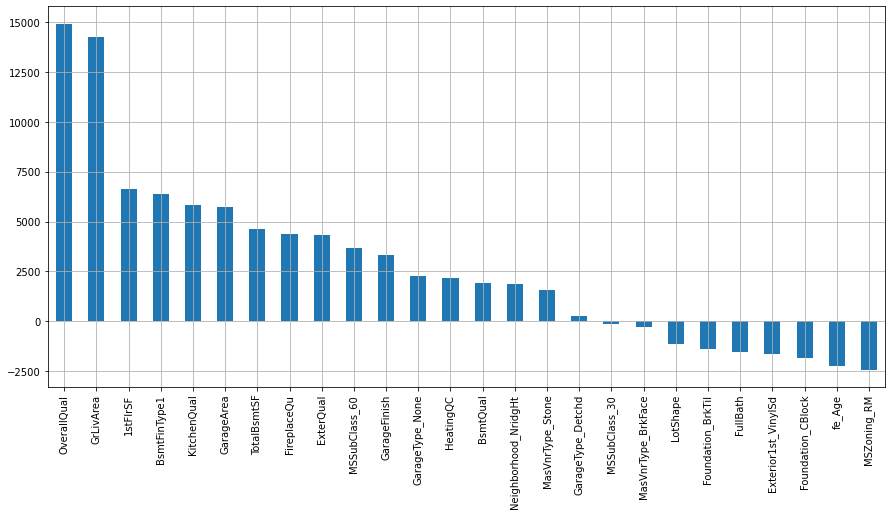

In [175]:
# features with higher scores are more useful in predicting, sorting will be easier to see
col_names = X_train.columns.tolist()
pd.Series(lasso.coef_, index=col_names).sort_values(ascending=False).plot.bar(figsize=(15,7)).grid(zorder=0);

**Observation**

Based on the selected features and after going through regularization (constraint to the limits of the range of tests for alphas). The best predictors are depicted in the Lasso model that minimized the RMSE the most. This production model shall be the basis for predicting sale prices of the Kaggle's Test data file.

In [176]:
lasso_coefficients = lasso.coef_
lasso_coefficients

array([14916.29785578,  4323.62628634,  5838.97223231, 14238.02669258,
       -2234.24311504,  1907.37318858,  5730.49621183,  3305.96615192,
        4618.74639917,  6649.65237203, -1542.74098925,  2149.77720082,
        4374.89555083, -1623.17970595,  3667.28227691,   244.06537841,
        6396.45297423, -1827.61538052,  1854.11780841, -2422.43124897,
       -1141.88807182,  1545.29789002,  -146.32828014, -1382.41416588,
        -264.91033997,  2294.28135307])

In [177]:
# put the coef into a dataframe
lasso_coef_df = pd.DataFrame({'predictors': [col for col in col_names],
                              'coefficients': lasso_coefficients})
print(len(lasso_coef_df))
lasso_coef_df

26


,predictors,coefficients
0,OverallQual,14916.297856
1,ExterQual,4323.626286
2,KitchenQual,5838.972232
3,GrLivArea,14238.026693
4,fe_Age,-2234.243115
5,BsmtQual,1907.373189
6,GarageArea,5730.496212
7,GarageFinish,3305.966152
8,TotalBsmtSF,4618.746399
9,1stFlrSF,6649.652372


# Finalizing Production Model

Here we performed the final preparation of the dataset for training our Lasso production model. There were 27 columns in total consisting of 26 features and the SalePrice column. There were 2050 rows of data.

In [178]:
# update production model feature list
prod_feat_list = X_reduced.columns.tolist()
print(X_reduced.shape)
prod_feat_list.append("SalePrice") #adding back salesprice
print(len(prod_feat_list))
print(prod_feat_list)

(1646, 26)
27
['OverallQual', 'ExterQual', 'KitchenQual', 'GrLivArea', 'fe_Age', 'BsmtQual', 'GarageArea', 'GarageFinish', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'HeatingQC', 'FireplaceQu', 'Exterior1st_VinylSd', 'MSSubClass_60', 'GarageType_Detchd', 'BsmtFinType1', 'Foundation_CBlock', 'Neighborhood_NridgHt', 'MSZoning_RM', 'LotShape', 'MasVnrType_Stone', 'MSSubClass_30', 'Foundation_BrkTil', 'MasVnrType_BrkFace', 'GarageType_None', 'SalePrice']


In [179]:
prod_df = final_train_df[prod_feat_list]
print(prod_df.shape)
prod_df.head()

(1646, 27)


,OverallQual,ExterQual,KitchenQual,GrLivArea,fe_Age,BsmtQual,GarageArea,GarageFinish,TotalBsmtSF,1stFlrSF,FullBath,HeatingQC,FireplaceQu,Exterior1st_VinylSd,MSSubClass_60,GarageType_Detchd,BsmtFinType1,Foundation_CBlock,Neighborhood_NridgHt,MSZoning_RM,LotShape,MasVnrType_Stone,MSSubClass_30,Foundation_BrkTil,MasVnrType_BrkFace,GarageType_None,SalePrice
0,6,4,4,1479,44,4,475.0,3,725.0,725,2,5,1,0,1,0,7,1,0,0,3,0,0,0,1,0,130500
1,7,4,4,2122,24,5,559.0,3,913.0,913,2,5,4,1,1,0,7,0,0,0,3,0,0,0,1,0,220000
2,5,3,4,1057,67,4,246.0,2,1057.0,1057,1,3,1,1,0,1,7,1,0,0,4,0,0,0,0,0,109000
3,5,3,3,1444,14,5,400.0,4,384.0,744,2,4,1,1,1,0,2,0,0,0,4,0,0,0,0,0,174000
4,6,3,3,1445,120,3,484.0,2,676.0,831,2,3,1,0,0,1,2,0,0,0,3,0,0,0,0,0,138500


# Exporting Production model data to next step (prod_df dataset to a csv file)

In [180]:
prod_df.to_csv('../datasets/prod_df.csv', index=False)

## We will continue in the next code file so we don't have to keep waiting for re-run processing of plots everytime.